In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
df = pd.read_csv('../input/column_2C_weka.csv')
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [68]:
df_new = df.copy() 
y_label = df['class'].values
df_new = df_new.drop(['class'],axis=1)
raw_data = df_new.as_matrix()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(raw_data, y_label, test_size=0.20, random_state=42)

In [69]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.reshape((y_train.shape[0],1))
y_test = y_test.reshape((y_test.shape[0],1))

In [70]:
X_train = np.append(X_train,np.zeros([1,X_train.shape[1]])+1,axis=0)
X_test = np.append(X_test,np.zeros([1,X_test.shape[1]])+1,axis=0)
X_train.shape

(7, 248)

In [71]:
y_train[y_train=='Abnormal']=1
y_train[y_train=='Normal']=0
y_test[y_test=='Abnormal']=1
y_test[y_test=='Normal']=0
y_train.shape

(248, 1)

In [72]:
def sigmoid(x):
    z = 1/(1+np.exp(-x))
    return z

In [73]:
def forward(train_x,w):
    w_new = np.copy(w)
    w_new = w_new.reshape((1,w.shape[0]))
    y = w_new.dot(train_x)
    return sigmoid(y.T)

In [74]:
def computeCost(train_x,yhat,train_y):
    #yhat = np.squeeze(forward(train_x,w,b))
    m = train_x.shape[1]
    cost = -1*np.sum(train_y*np.log(yhat)+(1-train_y)*np.log(1-yhat))/m
    return cost

In [75]:
def Func(train_x,w,train_y):
    #yhat = np.squeeze(forward(train_x,w,b))
    m = train_x.shape[1]
    yhat = forward(train_x,w)
    #cost = -1*np.sum(train_y*np.log(yhat)+(1-train_y)*np.log(1-yhat))/m
    cost = np.sum((train_y-yhat)*(train_y-yhat))/m
    return cost

In [103]:
def init(num=50,param=2,xu=100,xl=0):
    X_init = np.random.uniform(xl,xu,(num,param))
    return X_init
def update_best(X,Func,train_x,train_y):
    num = X.shape[0]
    param = X.shape[1]
    best = X[0,:]
    for i in range(num):
        if Func(train_x,X[i,:],train_y)<Func(train_x,best,train_y):
            best = X[i,:]
    return best
def crossover(X,F,xu,xl,Func,train_x,train_y):
    num = X.shape[0]
    param = X.shape[1]
    V = np.zeros([num,param])
    r = np.random.randint(0,num,size=(num,2))
    best = update_best(X,Func,train_x,train_y)
    for i in range(num):
        V[i,:] = best + F*(X[r[i,0],:]-X[r[i,1],:])
    
    V[V>xu] = xu
    V[V<xl] = xl
    return V
def mutate(X,V,C):
    num = X.shape[0]
    param = X.shape[1]
    
    U = np.zeros([num,param])
    for i in range(num):
        jrand = np.random.randint(0,param,size=1)
        for j in range(param):
            ran = np.random.rand()
            if ran<C :
                U[i,j] = V[i,j]
            else:
                U[i,j] = X[i,j]
    return U
def update(X,U,X_train,y_train):
    X_new = np.copy(X)
    num = X_new.shape[0]
    for i in range(num):
        if Func(X_train,X[i,:],y_train)>Func(X_train,U[i,:],y_train) :
        #if ackley(X[i,:])>ackley(U[i,:]) :
            X_new[i,:] = U[i,:]
    return X_new


In [116]:
W_init = init(num=100,param=7,xu=5,xl=-5)
W = np.copy(W_init)
w_hist = []
for t in range(1500):
    V = crossover(W,F=1.5,xu=5,xl=-5,Func=Func,train_x=X_train,train_y=y_train)
    U = mutate(W,V,C=.9)
    W = update(W,U,X_train,y_train)
    w_hist.append(W)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


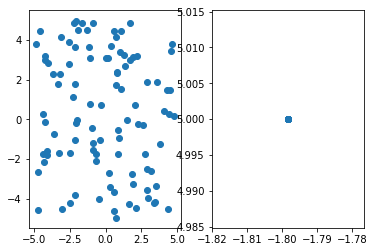

In [117]:
plt.subplot(121)
plt.scatter(W_init[:,0],W_init[:,1])
plt.subplot(122)
plt.scatter(W[:,0],W[:,1])
plt.show()

In [118]:
y_pred = forward(X_train,W[0,:])
y_pred[y_pred>0.5]=1
y_pred[y_pred<=0.5]=0
np.sum(y_pred==y_train)/y_train.shape[0]

0.8467741935483871

In [119]:
y_pred = forward(X_test,W[0,:])
y_pred[y_pred>0.5]=1
y_pred[y_pred<=0.5]=0
np.sum(y_pred==y_test)/y_test.shape[0]

0.9032258064516129